## Preprocessing

In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [21]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
new_df = application_df.drop(["EIN"], axis='columns')
new_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [22]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
print(new_df.nunique())

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [23]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
value_counts = new_df['NAME'].value_counts()
value_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [24]:
value_counts[value_counts<=5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

<AxesSubplot:ylabel='Density'>

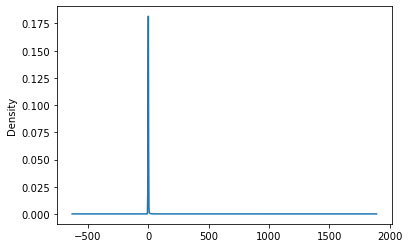

In [25]:
value_counts.plot.density()

In [26]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(value_counts[value_counts<5].index)
                                          
# Replace in dataframe
for app in application_types_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [27]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
CLASSIFICATION_value = new_df['NAME'].value_counts()
CLASSIFICATION_value

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [28]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
CLASSIFICATION = CLASSIFICATION_value[CLASSIFICATION_value>1]
CLASSIFICATION

PARENT BOOSTER USA INC                                            1260
TOPS CLUB INC                                                      765
UNITED STATES BOWLING CONGRESS INC                                 700
WASHINGTON STATE UNIVERSITY                                        492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                    408
                                                                  ... 
VETERANS OF FOREIGH WARS OF THE UNITED STATES DEPT OF COLORADO       2
ETA PHI BETA SORORITY INC                                            2
POINT MAN INTERNATIONAL MINISTRIES                                   2
MULTI COMMUNITY DIVERSIFIED SERVICES INC                             2
VETERANS OF FOREIGN WARS AUXILIARY                                   2
Name: NAME, Length: 792, dtype: int64

In [29]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(value_counts[value_counts<100].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [30]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL']
X = application_df.drop('IS_SUCCESSFUL', axis=1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn.summary()

2023-03-08 19:48:41.946598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 3647      
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 3,774
Trainable params: 3,774
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [35]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 4s 3ms/step - loss: 0.5612 - accuracy: 0.7322 - val_loss: 0.4551 - val_accuracy: 0.7844
Epoch 2/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4483 - accuracy: 0.7834 - val_loss: 0.4358 - val_accuracy: 0.7968
Epoch 3/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4343 - accuracy: 0.7892 - val_loss: 0.4351 - val_accuracy: 0.7966
Epoch 4/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4295 - accuracy: 0.7923 - val_loss: 0.4318 - val_accuracy: 0.7966
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4268 - accuracy: 0.7931 - val_loss: 0.4324 - val_accuracy: 0.7966
Epoch 6/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.7932 - val_loss: 0.4303 - val_accuracy: 0.7961
Epoch 7/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4237 - accuracy: 0.7941 - val_loss: 0.4328 - val_accuracy: 0.7992

Epoch 58/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4071 - accuracy: 0.8041 - val_loss: 0.4499 - val_accuracy: 0.8015
Epoch 59/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4068 - accuracy: 0.8051 - val_loss: 0.4452 - val_accuracy: 0.8025
Epoch 60/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4063 - accuracy: 0.8039 - val_loss: 0.4488 - val_accuracy: 0.8002
Epoch 61/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4064 - accuracy: 0.8045 - val_loss: 0.4447 - val_accuracy: 0.7997
Epoch 62/100
684/684 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8038 - val_loss: 0.4505 - val_accuracy: 0.8005
Epoch 63/100
684/684 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8048 - val_loss: 0.4455 - val_accuracy: 0.8031
Epoch 64/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.8053 - val_loss: 0.4487 - val_accuracy:

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4705 - accuracy: 0.7875 - 410ms/epoch - 2ms/step
Loss: 0.4705231189727783, Accuracy: 0.7875218391418457


In [38]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE\
nn.save('AlphabetSoupCharity_Optimization.h5')
